In [1]:
# DWT-Haar / Multimedia Processing
# Gourav Siddhad
# 14-October-2019

In [2]:
print('Importing Libraries', end='')

import cv2
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

print(' - Done')

Importing Libraries - Done


In [3]:
def print_shape(img):
    print('{:5.2f} {:5.2f}'.format(np.min(img), np.max(img)), np.shape(img))
    
def prep_image(img, bsize):
    a, b, c = img.shape
    
    if a%bsize==0:
        a1 = a
    else:
        a1 = bsize*(a//bsize + 1)
        
    if b%bsize==0:
        b1 = b
    else:
        b1 = bsize*(b//bsize + 1)
    
    newimg = np.zeros((a1, b1, c))
    newimg[0:a, 0:b, :] = img[:, :, :]
    return np.array(newimg, dtype='uint8')

def calc_error(img1, img2):
    return np.array(img1-img2, dtype='uint8')

In [4]:
def calc_dwt(img, level, th, thflag=False):
    # Calculate Binary Values Holder
    maxlevel = np.log2(len(img))
    
    # Calculate Total Values Possible
    if (maxlevel-int(maxlevel))>0:
        maxlevel = int(maxlevel) + 1
    totval = np.power(2, maxlevel)
    
    # Pad Zeros
    nimg = np.zeros((int(totval)))
    nimg[0:len(img)] = img
    
    # Partition
    val = int(np.power(2, level))
    proc = nimg[0:val]
    done = nimg[val:]
    
    # Calculate New Values
    out1, out2 = [], []
    i = 0
    while(i<len(proc)):
        v = (proc[i] + proc[i+1])/2
        if thFlag:
            if v>=th:
                v = v
            else:
                v = 0
        out1.append(v)
        
        v = (proc[i] - proc[i+1])/2
        if thFlag:
            if v>=th:
                v = v
            else:
                v = 0
        out2.append(v)
        i += 2
    
    # Finalize Vector
    final = []
    final.extend(out1)
    final.extend(out2)
    final.extend(done)
    
    return np.array(final)

In [5]:
def calc_idwt(img, level):
    # Calculate Binary Values Holder
    maxlevel = np.log2(len(img))
    if (maxlevel-int(maxlevel))>0:
        maxlevel = int(maxlevel) + 1
    totval = np.power(2, maxlevel)
    nimg = np.zeros((int(totval)))
    nimg[0:len(img)] = img
    
    val = int(np.power(2, level-1))
    proc = nimg[0:val]
    proc2 = nimg[val:2*val]
    done = nimg[2*val:]
    
    out = []
    for i, n in enumerate(proc):
        out.append(proc[i] + proc2[i])
        out.append(proc[i] - proc2[i])
        
    final = []
    final.extend(out)
    final.extend(done)
    
    return np.array(final)

In [6]:
img = np.array([56, 40, 8, 24, 48, 48, 40, 16], dtype='float32')
threshold = 0
thFlag = False

print('Image  - ', img)
print()
dimg = calc_dwt(img, 3, threshold, thFlag)
print('DWT {:01d}  - '.format(3), dimg)
dimg = calc_dwt(dimg, 2, threshold, thFlag)
print('DWT {:01d}  - '.format(2), dimg)
dimg = calc_dwt(dimg, 1, threshold, thFlag)
print('DWT {:01d}  - '.format(1), dimg)

print()
idimg = calc_idwt(dimg, 1)
print('iDWT {:01d} - '.format(1), idimg)
idimg = calc_idwt(idimg, 2)
print('iDWT {:01d} - '.format(2), idimg)
idimg = calc_idwt(idimg, 3)
print('iDWT {:01d} - '.format(3), idimg)

# 56, 40, 8, 24, 48, 48, 40, 16
# 48, 16, 48, 28, 8, -8, 0, 12
# 32, 38, 16, 10, 8, -8, 0, 12
# 35, -3, 16, 10, 8, -8, 0, 12

Image  -  [56. 40.  8. 24. 48. 48. 40. 16.]

DWT 3  -  [48. 16. 48. 28.  8. -8.  0. 12.]
DWT 2  -  [32. 38. 16. 10.  8. -8.  0. 12.]
DWT 1  -  [35. -3. 16. 10.  8. -8.  0. 12.]

iDWT 1 -  [32. 38. 16. 10.  8. -8.  0. 12.]
iDWT 2 -  [48. 16. 48. 28.  8. -8.  0. 12.]
iDWT 3 -  [56. 40.  8. 24. 48. 48. 40. 16.]


In [7]:
# Gray Scale Image

def calc_dwt_gray(img, maxl, minl, th, thFlag=False):
    timg = np.array(img)
    for i in range(maxl, minl-1, -1):
        nimg = []
        for row in timg:
            nimg.append(calc_dwt(row, i, th, thFlag))
        timg = np.array(nimg)
        nimg = []
        for row in timg.T:
            nimg.append(calc_dwt(row, i, th, thFlag))
        timg = np.array(nimg).T
    return timg
    
def calc_idwt_gray(img, maxl, minl):
    timg = np.array(img)
    for i in range(minl, maxl+1, 1):
        nimg = []
        for row in timg:
            nimg.append(calc_idwt(row, i))
        timg = np.array(nimg)
        nimg = []
        for row in timg.T:
            nimg.append(calc_idwt(row, i))
        timg = np.array(nimg).T
    return timg

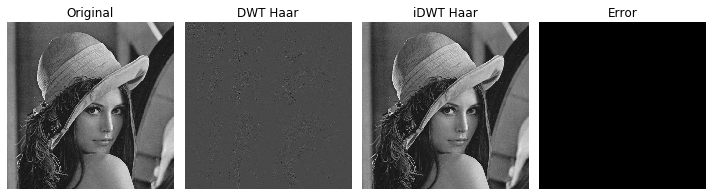

In [8]:
img = cv2.imread('lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th = -50
thFlag = False
maxl, minl = 9, 1

gimg = calc_dwt_gray(img, maxl, minl, th, thFlag)
rimg = calc_idwt_gray(gimg, maxl, minl)
eimg = img - rimg
    
fig, ax = plt.subplots(1, 4, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(gimg, cmap='gray')
ax[1].set_title('DWT Haar')
ax[1].axis('off')

ax[2].imshow(rimg, cmap='gray')
ax[2].set_title('iDWT Haar')
ax[2].axis('off')

ax[3].imshow(eimg, cmap='gray')
ax[3].set_title('Error')
ax[3].axis('off')

plt.tight_layout()
plt.show()

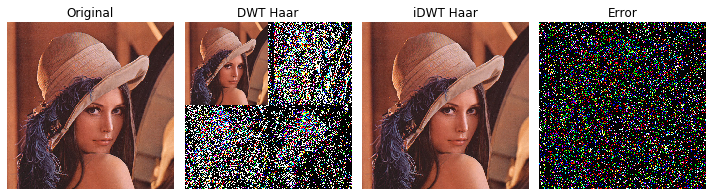

In [9]:
img = cv2.imread('lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img)

th = -50
thFlag = False
maxl, minl = 9, 9

gimg = np.array(img)
for i in range(3):
    gimg[:, :, i] = calc_dwt_gray(gimg[:, :, i], maxl, minl, th, thFlag)

rimg = np.array(gimg)
for i in range(3):
    rimg[:, :, i] = calc_idwt_gray(rimg[:, :, i], maxl, minl)
        
eimg = img - rimg

fig, ax = plt.subplots(1, 4, figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(gimg)
ax[1].set_title('DWT Haar')
ax[1].axis('off')

ax[2].imshow(rimg)
ax[2].set_title('iDWT Haar')
ax[2].axis('off')

ax[3].imshow(eimg)
ax[3].set_title('Error')
ax[3].axis('off')

plt.tight_layout()
plt.savefig('sample-dwt-haar.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# cv2.imwrite('0-original.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# cv2.imwrite('1-dwthaar.png', cv2.cvtColor(gimg, cv2.COLOR_RGB2BGR))
# cv2.imwrite('2-idwthaar.png', cv2.cvtColor(rimg, cv2.COLOR_RGB2BGR))